<a href="https://colab.research.google.com/github/datagrad/1.ML/blob/main/HR_Attrition_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [175]:
url = 'https://raw.githubusercontent.com/datagrad/DataScience-Projects/main/HR-Employee-Attrition.csv'
df = pd.read_csv(url)


In [176]:
# Attrition as Categorical Variable, change to Binary

df['Attrition'] = df.Attrition.astype("category").cat.codes
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int8

In [177]:
# Dropping non relevent Columns

df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)


In [178]:
# taking Categorical Columns list
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
categorical_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [179]:
# Changing Categorical Columns to Binary
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [180]:
df[categorical_col]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,2,2,1,0,7,2,1
1,1,1,1,1,6,1,0
2,2,1,4,1,2,2,1
3,1,1,1,0,6,1,1
4,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...
1465,1,1,3,1,2,1,0
1466,2,1,3,1,0,1,0
1467,2,1,1,1,4,1,1
1468,1,2,3,1,7,1,0


In [181]:
X = df.drop('Attrition', axis=1)
y = df.Attrition


In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [183]:

from sklearn import tree

X_train
y_train

# Building tree model
Dtree = tree.DecisionTreeClassifier(
    # max_depth= 15
    max_leaf_nodes = 9
    )

Dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=9)

|--- OverTime <= 0.50
|   |--- TotalWorkingYears <= 2.50
|   |   |--- class: 0
|   |--- TotalWorkingYears >  2.50
|   |   |--- class: 0
|--- OverTime >  0.50
|   |--- MonthlyIncome <= 2475.00
|   |   |--- DailyRate <= 931.00
|   |   |   |--- class: 1
|   |   |--- DailyRate >  931.00
|   |   |   |--- YearsInCurrentRole <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- YearsInCurrentRole >  2.50
|   |   |   |   |--- class: 0
|   |--- MonthlyIncome >  2475.00
|   |   |--- MaritalStatus <= 1.50
|   |   |   |--- class: 0
|   |   |--- MaritalStatus >  1.50
|   |   |   |--- YearsSinceLastPromotion <= 5.50
|   |   |   |   |--- HourlyRate <= 53.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- HourlyRate >  53.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- YearsSinceLastPromotion >  5.50
|   |   |   |   |--- class: 1



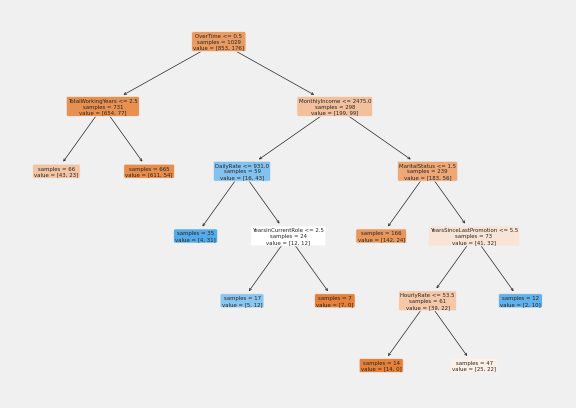

In [184]:
# Plotting the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure()

feature_names = X_train.columns.tolist()  # This extracts the column names (feature names)


plot_tree(Dtree,
          filled = True,
          rounded = True,
          impurity = False,
          feature_names = feature_names)
print(export_text(Dtree,feature_names = feature_names))

In [185]:
predict1 =Dtree.predict(X_test)
predict1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [186]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc


cm = confusion_matrix(y_test,predict1)
print(cm)

print('accuracy : ',accuracy_score(y_test,predict1))

print('precision:',  precision_score(y_test,predict1))

print('recall:', recall_score(y_test, predict1))

print('F1 Score : ',(f1_score(y_test, predict1)))



[[376   4]
 [ 55   6]]
accuracy :  0.8662131519274376
precision: 0.6
recall: 0.09836065573770492
F1 Score :  0.16901408450704225


*   accuracy :  0.8662131519274376
*   precision: 0.6
*   recall: 0.09836065573770492
*   F1 Score :  0.16901408450704225

**F1 Score of  0.16901408450704225 is still not good**


In [187]:
from sklearn.metrics import roc_curve, auc

prediction_probabilities = Dtree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities)
roc_auc = auc(fpr, tpr)
print('roc_auc:', roc_auc)

roc_auc: 0.6297886108714408


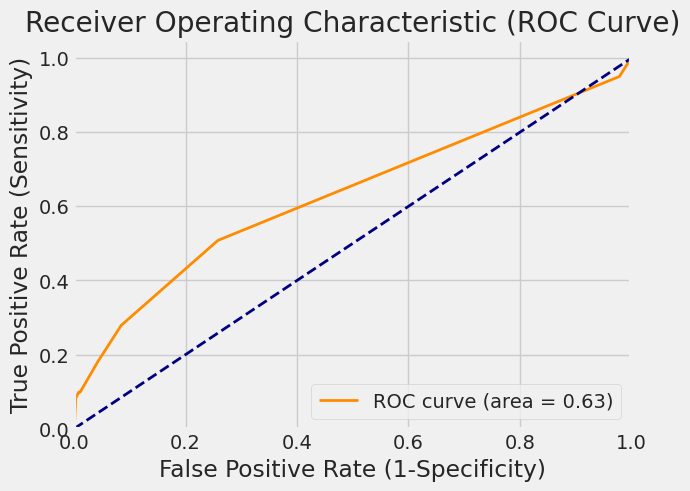

In [188]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.show()

# Pruning

## max_leaf_nodes - Finetuning

In [198]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

#training Tree Model
# Start testing from a huge number like max_leaf_nodes = 1000 and keep coming down unless Train Accuracy and Test Accuracy converges
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 9)
# clf = tree.DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
# cm1 = confusion_matrix(y_train,predict1)
accuracy1 = accuracy_score(y_train,predict1)
print("Train Accuracy", accuracy1)

#On Test Data
# cm2 = confusion_matrix(y_test,predict2)
accuracy2 = accuracy_score(y_test,predict2)
print("Test Accuracy", accuracy2)

print('--------------------')

precision1 = precision_score(y_train,predict1)
print("Train precision", precision1)

#On Test Data
# cm2 = confusion_matrix(y_test,predict2)
precision2 = precision_score(y_test,predict2)
print("Test precision", precision2)

print('--------------------')

recall1 = recall_score(y_train,predict1)
print("Train recall", recall1)

#On Test Data
recall2 = recall_score(y_test,predict2)
print("Test recall", recall2)

Train Accuracy 0.9261418853255587
Test Accuracy 0.8367346938775511
--------------------
Train precision 0.9464285714285714
Test precision 0.3333333333333333
--------------------
Train recall 0.6022727272727273
Test recall 0.18032786885245902


In [197]:
# max_leaf_nodes = int(input())

35
